# Portfolio of Evidence — Convolutional Neural Networks (CNN) - ST10458509

The goal of this notebook is to do an EDA on the CIFAR-10 Image Dataset to train and test a CNN Model for image recognition for the publishing house.

The CIFAR-10 dataset is a widely used dataset for image classification. It contains 60,000 colour images (32×32) across 10 classes (e.g. airplane, cat, dog, automobile).
This dataset was chosen for it's suitability to the task, containing real-world images and is large enough to sufficiently train a CNN model. 
All images are uniform in size (32x32 RGB images) and each class is already balanced and contains 6000 images each. It has already been pre-split which will allow focus on the effective data exploration methods and model training and evaluation required for this task.

CIFAR dataset can be found at: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

The downloadable version of the CIFAR-10 dataset hosted by the institute who compiled, has been pickled.
This method was approached with weariness due to the nature of how Pickling occurs in Python. 

Pickling allows the user the ability to save and transmit for later use. It is Python module used for serializing and de-serializing a Python object structure. This means it takes the scattered data on the disk in chunks and translates this data into series that can be saved and converted back for later use. Pickling is a way to convert a Python object (list, dictionary, etc.) into a character stream. It provides a facility to convert any Python object to a byte stream. This Byte stream contains all essential information about the object so that it can be reconstructed, or "unpickled" and get back into its original form in any Python (GeekforGeeks, 2024).

For all of this to work, the actual data stream format of pickle is really a very simple programming language, which is evaluated when you load a pickle stream to actually create the deserialized object. This makes it possible to inject custom code into a generated pickle object to make it run arbitrary Python code at the time of loading. There is no practical way to verify that the pickled code doesn't contain anything malicious, making its use risky.

The CIFAR Dataset with be downloaded directly from the PyTorch library to avoid undergoing 'de-pickling'. The code has been included for perusal but will not be used for this notebook.

## Importing the Necessary Libraries

In [63]:
#Importing libraries
import pandas as pd

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
# For plotting inline
%matplotlib inline

# Import seaborn
import seaborn as sns
# Applying the default theme
sns.set_theme()

import numpy as np
# import pickle

from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [2]:
# Function to unpickle CIFAR batches
# def unpickle(file):
#   with open(file, 'rb') as fo:
#       dict = pickle.load(fo, encoding='latin1')
#   return dict

# Path to your extracted dataset
# data_path = "cifar-10-batches-py/"


In [40]:
# Transform includes ToTensor + normalization

transform = transforms.Compose([
    transforms.ToTensor(),  # converts 0-255 PIL image to [0,1] tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # scale to [-1,1]
])


## Loading Training Data using PyTorch

In [49]:
import torchvision.transforms as transforms, torchvision, matplotlib.pyplot as plt

trainset = torchvision.datasets.CIFAR10(root='/Users/rickjackson/Downloads', 
                                        train=True, 
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4, 
                                          shuffle=True)
images, labels = next(iter(trainloader))


Training data now loaded via PyTorch.

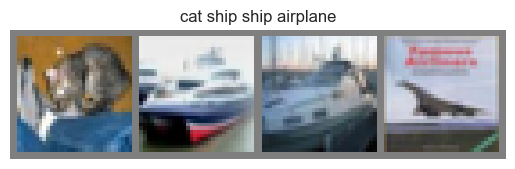

In [51]:
# Display a batch of test images
test_images, test_labels = next(iter(testloader))
img_test = torchvision.utils.make_grid(test_images)
img_test = img_test * 0.5 + 0.5  # unnormalize for display

plt.imshow(img_test.permute(1, 2, 0))
plt.title(' '.join(testset.classes[label.item()] for label in test_labels))
plt.axis('off')
plt.show()

## Loading Test Data using PyTorch

In [47]:
# transform is defined using existing transform already defined above.

# e.g. transform = transforms.Compose([...]) 

# Loading the CIFAR-10 test set
testset = torchvision.datasets.CIFAR10(
    root='/Users/rickjackson/Downloads',
    train=False,        # <-- differentiator to get test set.
    download=True,
    transform=transform
)

# Create DataLoader for test set
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,       # same as trainloader
    shuffle=False       # no shuffling required for test data
)


Test data now loaded via PyTorch

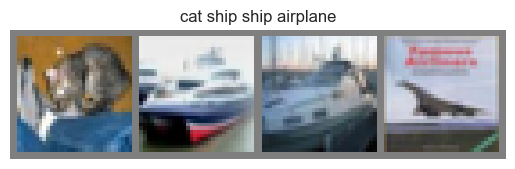

In [48]:
# Display a batch of test images
test_images, test_labels = next(iter(testloader))
img_test = torchvision.utils.make_grid(test_images)
img_test = img_test * 0.5 + 0.5  # unnormalize for display

plt.imshow(img_test.permute(1, 2, 0))
plt.title(' '.join(testset.classes[label.item()] for label in test_labels))
plt.axis('off')
plt.show()

Now the CIFAR-10 dataset has been loaded via PyTorch for training and testing.

## Data Verification

Initial Data Exploration steps to get a glean of the dataset being worked with.

In [10]:
# Checking for how many training samples are in the loaded dataset.

print("Training samples:", len(trainset))


Training samples: 50000


In [19]:
# Show shape of one image
img, label = trainset[0]
print("Image shape:", img.shape)
print("Label:", label)


Image shape: torch.Size([3, 32, 32])
Label: 6


The above line corroborates with the dimensions described by the dataset compilers.
Image dimensions match the 32 X 32 X 3, which is expected of CIFAR-10 Image dataset.

Verification of dataloader behaviour.

In [34]:
batch = next(iter(trainloader))
print("Batch image tensor size:", batch[0].shape)
print("Batch label tensor size:", batch[1].shape)


Batch image tensor size: torch.Size([4, 3, 32, 32])
Batch label tensor size: torch.Size([4])


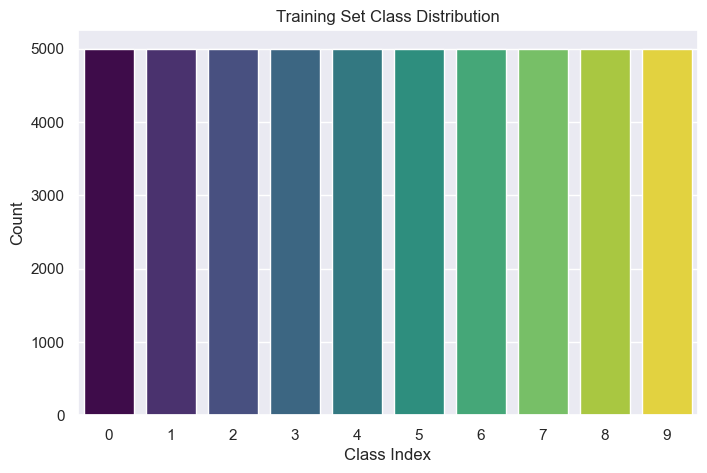

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [28]:
targets = [label for _, label in trainset]

plt.figure(figsize=(8,5))

sns.countplot(
    x=targets, 
    hue=targets,       # required to use a palette as seaborn.countplot() is changing its API.
    palette="viridis",
    legend=False       # hide redundant legend
)

plt.title("Training Set Class Distribution")
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.show()

print("Classes:", trainset.classes)

The graph shows all classes are loaded with exactly 5000 samples each. This indicates classes are balanced.

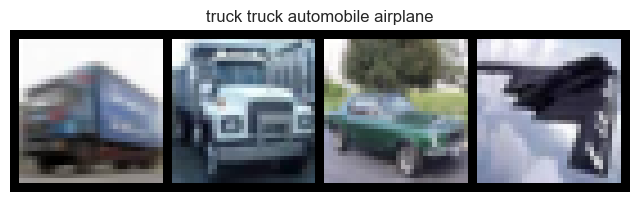

In [42]:
# Get one batch
images, labels = next(iter(trainloader))

# Unnormalize for display
images_unnorm = unnormalize(images)

# Make grid of images
img_grid = torchvision.utils.make_grid(images_unnorm)

# Convert to numpy for matplotlib
npimg = img_grid.numpy().transpose((1, 2, 0))

plt.figure(figsize=(8,4))
plt.imshow(npimg)
plt.axis('off')
plt.title(' '.join(trainset.classes[label] for label in labels))
plt.show()


### Checking for Missing Values

The dataset compilers and PyTorch assures there are no missing or corrupted values, but the check is performed anyway.

In [30]:
missing_count = 0
corrupted_count = 0

for i in range(50000):  # check entire training set - because confirmed above 5000 images in each class.
    img, _ = raw_trainset[i]
    img_np = np.array(img)

    if img_np is None:
        missing_count += 1

    # Corrupted Files = all pixel values are likely to show up as more identical in a corrupted file, 
    # no diversification in pixel values does not make an image.
    if np.all(img_np == img_np[0,0,0]):
        corrupted_count += 1

print("Missing images:", missing_count)
print("Corrupted images:", corrupted_count)


Missing images: 0
Corrupted images: 0


In [29]:
raw_trainset = torchvision.datasets.CIFAR10(
    root='/Users/rickjackson/Downloads',
    train=True,
    download=False,
    transform=None  # No transform = raw images
)

raw_imgs = np.stack([np.array(raw_trainset[i][0]) for i in range(10000)])  # sample 10k images
print("Pixel Mean:", raw_imgs.mean())
print("Pixel Std Dev:", raw_imgs.std())
print("Min Pixel:", raw_imgs.min())
print("Max Pixel:", raw_imgs.max())


Pixel Mean: 121.04103444010417
Pixel Std Dev: 64.39060047846117
Min Pixel: 0
Max Pixel: 255


This is an image of a frog


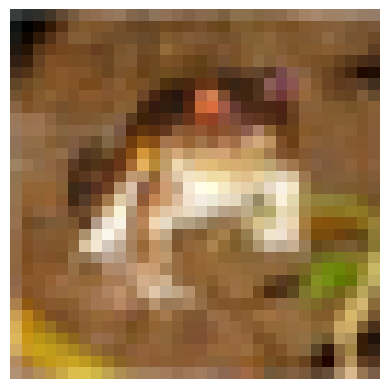

In [21]:
image, label = trainset[example]

print("This is an image of a " + trainset.classes[label])

# unnormalize for display
img = image * 0.5 + 0.5
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.show()

The image shown by the code above displays an example image from the training set. 
Executing this code displays the first image from the training set, which is a frog, paired with it’s label.

In [22]:
# directly access the training set again from .datasets, and set the transform keyword argument to transforms.ToTensor())

datasetT = torchvision.datasets.CIFAR10(root='/Users/rickjackson/Downloads', train=True, download=True, transform=transforms.ToTensor())


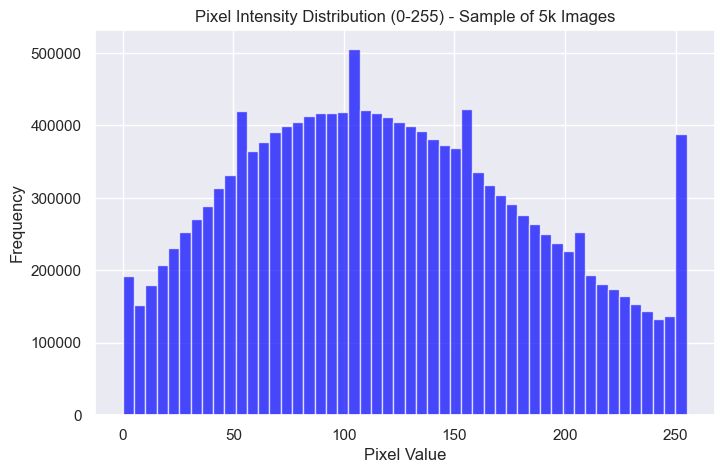

In [36]:
# Sample first 5000 images to speed up histogram
import numpy as np

raw_trainset = torchvision.datasets.CIFAR10(root='/Users/rickjackson/Downloads',
                                            train=True,
                                            download=False,
                                            transform=None)

# Convert images to numpy arrays and flatten
sample_imgs = np.stack([np.array(raw_trainset[i][0]) for i in range(5000)])
sample_pixels = sample_imgs.ravel()

plt.figure(figsize=(8,5))
plt.hist(sample_pixels, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution (0-255) - Sample of 5k Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


## Building the Model

In this step, the CNN architecture is defined, suitable for use with PyTorch.

In [56]:
import torch.nn.functional as F

class CIFAR10CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.dropout = nn.Dropout(0.2)
        
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)

        x = x.flatten(1)   # flatten from conv shape → vector
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


An instance of the classes needs to be defined to run the model:

In [57]:
model = CIFAR10CNN(num_classes=10)


This task is conducted on a MacBook Pro M2 the code below reflects this:

In [59]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

print("Running on:", device)

Running on: mps


Here the instance is defined and will be processed using the GPU MPS on Apple Silicon M2

In [60]:
model = CIFAR10CNN(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Setting up the Training Loop

In [ ]:

epochs = 5
train_losses = []
train_acc = []

for epoch in range(epochs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    # tqdm progress bar for the batches
    loop = tqdm(trainloader, leave=True)
    loop.set_description(f"Epoch [{epoch+1}/{epochs}]")

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update tqdm bar description
        loop.set_postfix({
            "loss": f"{running_loss / (total/labels.size(0)): .4f}",
            "acc": f"{100 * correct / total: .2f}%"
        })
    
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)

    print(f"\nEpoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.2f}%\n")


Epoch [1/5]:   5%| | 620/12500 [00:15<05:02, 39.28it/s, loss=0.1982, acc=93.59%]

KeyboardInterrupt



### Plotting the training curves

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Training Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="Training Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.show()
